In [ ]:
https://www.kaggle.com/mgmarques/cnn-exercise-deep-learning-for-computer-vision

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_path = '/content/gdrive/My Drive/Pierangela/Lesson 8 - Deep Learning/'

Mounted at /content/gdrive


**Import Packages**

In [2]:
import os
import numpy as np
import pandas as pd
import pylab 
from PIL import Image
from IPython.display import SVG
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

%matplotlib inline

import math
import timeit
from six.moves import cPickle as pickle
import platform
#from subprocess import check_output
import glob

import tensorflow as tf
import keras
from keras.constraints import maxnorm
#from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.utils.np_utils import to_categorical   
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from tqdm import tqdm_notebook
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from keras.datasets import cifar10


**Load and Prepare Data**

The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images divided into five training batches and one test batch, each with 10000 images. 

**Batch** *size is a term used in machine learning and refers to the number of training examples utilized in one iteration.*

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 15s 0us/step


In [ ]:
(32,32,3)
# (N-images, imw, imgH, Channel)

(32, 32, 3)

**Scaling the Data**
Using the raw values as input features might make models biased toward features having high magnitude values. It is still recommended to normalize and scale down the features, in our case, the images has a maximum of 255 pixels, then it is sufficient divide the dataset by 255.0 to normalize the data.

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

**one hot encoding of the labels, resulting in 10 classes**

In [ ]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
num_classes = Y_test.shape[1] #10

In [ ]:
Y_test.shape

(10000, 10)

**Data Augmentation**

Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and augmentation.

Data augmentation are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(X_train)

**Set Global Variables and Seed**

In [ ]:
input_shape = (32, 32, 3)
kernel = (3, 3)

# fix random seed for reproducibility 
seed = 101
np.random.seed(seed)

**Create the CNN Model**

Since we have two dimensional images (the third dimension is the channel information), we will be using Conv2D layers. 

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=kernel, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=kernel, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

**Compiling the model**

We use categorical_crossentropy as our loss function since we are dealing with multiple classes. Besides this, we use the Adam optimizer and then train the classifier on the training data.

In [ ]:
#training
batch_size = 64
epochs = 75
lrate = 0.01
epsilon=1e-08
decay=1e-4
#optimizer = keras.optimizers.rmsprop(lr=lrate,decay=1e-4)
#optimizer = keras.optimizers.Adadelta(lr=lrate ) #, epsilon=epsilon, decay=decay)
optimizer = keras.optimizers.Adam(lr=lrate, beta_1=0.9, beta_2=0.999, epsilon=epsilon, decay=decay)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

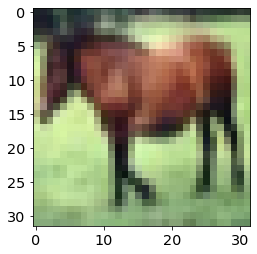

In [ ]:
plt.imshow(X_train[7,:])

**Start training**

call the fit_generator() function to pass the data generator and the desired length of an epoch as well as the total number of epochs on which to train. 


In [ ]:
#Y_train = Y_train[:,:,0]
#Y_test = Y_test[:,:,0]
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs, verbose=1,
                    validation_data=(X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/75
781/781 [==============================] - 221s 282ms/step - loss: 2.2996 - accuracy: 0.1717 - val_loss: 1.9410 - val_accuracy: 0.2930
Epoch 2/75
781/781 [==============================] - 221s 282ms/step - loss: 1.8102 - accuracy: 0.3135 - val_loss: 1.7597 - val_accuracy: 0.3245
Epoch 3/75
781/781 [==============================] - 220s 282ms/step - loss: 1.7750 - accuracy: 0.3285 - val_loss: 1.7347 - val_accuracy: 0.3387
Epoch 4/75
781/781 [==============================] - 218s 279ms/step - loss: 1.7477 - accuracy: 0.3458 - val_loss: 1.7270 - val_accuracy: 0.3559
Epoch 5/75
781/781 [==============================] - 219s 281ms/step - loss: 1.7260 - accuracy: 0.3512 - val_loss: 1.6720 - val_accuracy: 0.3852
Epoch 6/75
781/781 [==============================] - 217s 278ms/step - loss: 1.7183 - accuracy: 0.3555 - val_loss: 2.5615 - val_accuracy: 0.2671
Epoch 7/75
266/781 [=========>....................] - ETA: 2:16 - loss: 1.7172 - accuracy: 0.3558